# Στοιχεία Ομάδας
***

|Όνομα|ΑΜ|Ομάδα|
|-|-|-|
|Λιάτσος Γεώργιος-Ελευθέριος|03114026|Α11|
|Κουτρούλης Σπυραντώνης     |03114864|Α11|

In [0]:
! pip install deap

# Μέρος 1: Συνάρτηση Langerman
<img src='../files/langerman.png'>


Εισάγουμε αρχικά όσες βιβλιοθήκες θα χρειαστούμε για την εφαρμογή μας, καθώς και ό,τι χρειαζόμαστε από την DEAP για την χρήση των γενετικών αλγορίθμων.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi,exp,cos
import random
import numpy as np
from deap import base, creator, algorithms,tools

Ορίζουμε έπειτα κάποιες δικές μας συαρτήσεις, τη συνάρτηση προς ελαχιστοποίηση ***Langerman***, τις feasible και distance που θα χρησιμοποιηθούν όπως και στα notebooks του εργαστηρίου καθώς και μια συνάρτηση ***regfunc*** η οποία ανάλογα με τα ορίσματα που δέχεται ορίζει στο toolbox τους τελεστές μετάλλαξης και διασταύρωσης που θα χρησιμοποιηθούν, καθώς και τις ανίστοιχες υπερπαραμέτρους τους.

In [0]:
# Η συνάρτηση Langerman προς ελαχιστοποίηση
def langerman(x):
    A = np.array([[9.681, 0.667, 4.783, 9.095, 3.517, 9.325, 6.544, 0.211, 5.122, 2.020],
              [9.400, 2.041, 3.788, 7.931, 2.882, 2.672, 3.568, 1.284, 7.033, 7.374],
              [8.025, 9.152, 5.114, 7.621, 4.564, 4.711, 2.996, 6.126, 0.734, 4.982],
              [2.196, 0.415, 5.649, 6.979, 9.510, 9.166, 6.304, 6.054, 9.377, 1.426],
              [8.074, 8.777, 3.467, 1.863, 6.708, 6.349, 4.534, 0.276, 7.633, 1.567]]);
    C = np.array([0.806, 0.517, 1.5, 0.908, 0.965]);
    m = 5;
    outer = 0;
    for i in range(1,m):
        inner = 0;
        for k in range(0,np.size(x)):
            inner += (x[k]-A[i][k])**2;
        outer += C[i]*exp(-inner/pi)*cos(pi*inner);
    return (-outer,);

D = 10;
MIN_BOUND = np.array([0]*D)
MAX_BOUND = np.array([10]*D)

#Οι συναρτήσεις feasible και distance που θα κάνουν decorate την evaluation function μας.
def feasible( indiv ):
    if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
        return False
    return True

def distance(indiv) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if(indiv[i] < MIN_BOUND[i]) : penalty = 0 - indiv[i]
        if(indiv[i] > MAX_BOUND[i]) : penalty = indiv[i] - 10
        dist = dist + penalty
    return dist

#Η συνάρτηση ορισμού γενετικών τελεστών και υπερπαραμέτρων
#Δέχεται ως όρισμα το alpha της cxBlend, τα indpb των cxUniform, muGaussian και muFlipBit,
#το tournsize της selTournament, τις πιθανότητες διασταύρωσης και μετάλλαξης και το 
#toolbox στο οποίο θα γίνουν register οι τελεστές.
def regfunc(alpha,indpb,tournsize,cxfunc,mufunc,toolbox):
    if cxfunc == "Blend":
        toolbox.register( "mate", tools.cxBlend,alpha=alpha)
    else:
        toolbox.register( "mate", tools.cxUniform,indpb=alpha)

    if mufunc == "Gaussian":
        toolbox.register( "mutate", tools.mutGaussian, mu = 2.5, sigma=1.0, indpb=indpb) 
    else:
        toolbox.register( "mutate", tools.mutFlipBit,indpb=indpb)
    
    toolbox.register( "select", tools.selTournament,tournsize=tournsize)


Γίνονται register έπειτα η επιθυμία ελαχιστοποίησης της συνάρτησης, το πεδίο ορισμού της, ο πληθυσμός και τελικά η συνάρτηση η οποία γίνεται decorate απο τις feasible και distance που ορίστηκαν προηγουμένως με   Δ=2X10=20

In [0]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create( "IndividualContainer", list , fitness= creator.FitnessMin)

toolbox = base.Toolbox()

# Structure initializers
toolbox.register( "InitialValue", np.random.uniform, 0, 10)
toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, D)
toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)

toolbox.register( "evaluate", langerman)
toolbox.decorate( "evaluate", tools.DeltaPenality (feasible, 10.0, distance))



Όρίζονται τώρα οι τρεις στρατηγικές εξέλιξης που θα δοκιμάσουμε, χρησιμοποιώντας 100 γενεές και πληθυσμό 200 για να πετύχουμε τους χρονικούς περιορισμούς που περιγράφονται στην εκφώνηση της άσκησης. Για τους μ+λ και μ,λ αλγορίθμους χρησιμοποιούμε μ=75 , λ=125, αναλογία στην οποία καταλήξαμε  βάσει αναζήτησης στο διαδύκτιο και βάσει αποτελεσμάτων στις διάφορες δοκιμές μας. 

In [0]:
def ea_with_stats(cxpb,mutpb,m,l,tb):      
    pop = tb.population(n=m+l)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, tb, cxpb, mutpb, ngen=100, stats=stats, halloffame=hof, verbose=False)
    return pop, logbook, hof

def eaMuPlusLamda_with_stats(cxpb,mutpb,m,l,tb):      
    pop = tb.population(n=m+l)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaMuPlusLambda(pop, tb, m, l, cxpb, mutpb, ngen=100, stats=stats, halloffame=hof, verbose=False)
    return pop, logbook, hof

def eaMuCommaLamda_with_stats(cxpb,mutpb,m,l,tb):      
    pop = tb.population(n=m+l)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaMuCommaLambda(pop, tb, m, l, cxpb, mutpb, ngen=100, stats=stats, halloffame=hof, verbose=False)
    return pop, logbook, hof



## Κριτήρια Αξιολόγησης Γενετικών Αλγορίθμων
Δημιουργούμε έπειτα την κύρια συνάρτηση ***solve*** . Αυτή δέχεται ως ορίσματα τη στρατιγική εξέλιξης, το delta που επιλέγουμε, τις πιθανότητες διασταύρωσης και μετάλλαξης, τους γύρους που τρέχουμε κάθε φορά, τις τιμές για τα μ και λ καθώς και το ολικό ελάχιστο της συνάρτησης βάσει βιβλιογραφίας.
Μέσα σε αυτήν υπολογίζουμε και επιστρέφουμε όλα τα απόλυτα και σχετικά κριτήρια που ζητούνται από την εκφώνηση. Τρέχοντας για 5 γύρους τη συνάρτηση ελέγχουμε τους μέσους όρους ελαχίστων, συνολικών αποτιμήσεων και χρόνου εκτέλεσης γύρου, καθώς και τις επιτυχείες που έχουμε σε ένα περιθώριο delta από το ολικό ελάχιστο και για αυτές τις επιτυχίες τους μέσους όρους των γενεών που χρειάστηκαν για να ευρεθεί η τιμή, των ελαχίστων τιμών που εντοπίστηκαν ως επιτυχείς και των αποτιμήσεων που χρειάστηκαν για να έχουμε την πρώτη επιτυχία.

In [0]:
def solve(algo,delta,cxprob,muprob,rounds,m,l,tb,global_min):
    time_total = 0.0;
    min_sum = 0.0;
    goal = global_min+delta
    successes = 0
    savgen  = 0
    savgmin = 0
    savgevs = 0

    for i in range (0,rounds):
      
        #Απόλυτα κριτήρια 
        import time
        start_time = time.time();
        pop, log, hof = algo(cxprob,muprob,m,l,tb)
        end_time = time.time()-start_time
        time_total += end_time

        #Σχετικά κριτήρια
        log_min = log.select('min')
        s = min(log_min)
        min_sum += s
        if s <= goal:
            successes += 1
            
        evals = 0;
        flag = 0;
        for j in range(0,np.size(log)):
            evals += log[j]['nevals'] 
            if goal > log_min[j] and flag==0:
                savgen += j
                savgmin += log_min[j]
                savgevs += evals
                flag = 1 
    if successes>0:
        return successes, evals/rounds, min_sum/rounds,  time_total/rounds, savgevs/successes, savgen/successes,savgmin/successes
    else:
        return successes, evals/rounds, min_sum/rounds,  time_total/rounds,  0,0,0
    
  

## Εκτύπωση Στρατηγικής, Υπερπαραμέτρων και Απόδοσης
Τέλος, δημιουργούμε την ***results***, συνάρτηση η οποία δημιουργεί το dataframe σύγκρισης των αλγορίθμων, όπως φαίνεται στην εκφώνηση της άσκησης. Τρέχει για τις 3 στρατηγικές και τους 32 διαφορετικούς συνδυασμούς υπερπαραμέτρων και γενετικών τελεστών και δημιουργεί ένα dataframe με τα στοιχεία της στρατηγικής και των τελεστών και όλα τα κριτήρια (απόλυτα και σχετικά) αξιολόγησής τους.

In [0]:
def results(tb,delta,global_min):
    import pandas as pd
    col = {'Crossover':[],'Mutation':[],'Selection':[],'Strategy':[],'Successes':[], 'avg_evals':[],'avg_min':[],'avg_time':[],'s_avg_evals':[],'s_avg_gens':[],'s_avg_min':[]}
    df = pd.DataFrame(col)
    #Κάποιες σταθερές που χρησιμοποιούμε για όλες τις στρατηγικές
    i = 0; cxp=0.8; mup=0.2
    rounds = 5; m = 75; l = 125
    algos = [[ea_with_stats,"ea_simple "], [eaMuPlusLamda_with_stats,"eaMuPlusLamda " ],[eaMuCommaLamda_with_stats,"eaMuCommaLambda "]]
    
    #32 συνδυασμοί τελεστών 
    cxs = [["Low ","Blend",0.2], ["Low ","Uniform",0.02],["High ","Blend",0.6], ["High ","Uniform",0.2]]
    mus = [["Low ","Gaussian",0.02],["Low ","FlipBit",0.02],["High ","Gaussian",0.2],["High ","FlipBit",0.2]]
    sls = [["Low ",2],["High ",5]]
    
    #Δημιουργία του συνολικού dataframe
    for algo in algos:
        for cxpb in cxs:
            for mupb in mus: 
                for slpb in sls:
                    regfunc(cxpb[2],mupb[2],slpb[1],cxpb[1],mupb[1],tb)
                    a,b,c,d,e,f,g=solve(algo[0],delta,cxp,mup,rounds,m,l,tb,global_min)
                    if algo[1] == "ea_simple ":
                        df.loc[i] = [cxpb[1] + " " + cxpb[0], mupb[1] + " " + mupb[0], slpb[0], algo[1] + str(cxp) + ' ' + str(mup)+' 200',a,b,c,round(d,2),round(e,2),round(f,2),g]
                        i += 1
                    else :
                        df.loc[i] = [cxpb[1] + " " + cxpb[0], mupb[1] + " " + mupb[0], slpb[0], algo[1] + str(cxp) + ' ' + str(mup)+' 75 125',a,b,c,round(d,2),round(e,2),round(f,2),g]
                        i += 1
    return df

In [0]:
#df = results(toolbox,0.8,-1.4)

In [0]:
import joblib
df=joblib.load("df.pkl")


In [0]:
df

,Crossover,Mutation,Selection,Strategy,Successes,avg_evals,avg_min,avg_time,s_avg_evals,s_avg_gens,s_avg_min
0,Blend Low,Gaussian Low,Low,ea_simple 0.8 0.2 200,0.0,3392.0,-0.008766,2.79,0.0,0.0,0.000000
1,Blend Low,Gaussian Low,High,ea_simple 0.8 0.2 200,3.0,3410.0,-0.536802,2.90,2359.0,13.0,-0.713214
2,Blend Low,FlipBit Low,Low,ea_simple 0.8 0.2 200,0.0,3378.0,-0.010910,2.75,0.0,0.0,0.000000
3,Blend Low,FlipBit Low,High,ea_simple 0.8 0.2 200,4.0,3393.0,-0.676799,2.88,2263.0,12.0,-0.733367
4,Blend Low,Gaussian High,Low,ea_simple 0.8 0.2 200,0.0,3396.0,-0.029478,2.75,0.0,0.0,0.000000
5,Blend Low,Gaussian High,High,ea_simple 0.8 0.2 200,4.0,3405.0,-0.722563,2.86,2388.0,13.0,-0.766179
6,Blend Low,FlipBit High,Low,ea_simple 0.8 0.2 200,0.0,3412.0,-0.000627,2.70,0.0,0.0,0.000000
7,Blend Low,FlipBit High,High,ea_simple 0.8 0.2 200,2.0,3405.0,-0.552021,2.86,3213.0,18.0,-0.731999
8,Uniform Low,Gaussian Low,Low,ea_simple 0.8 0.2 200,0.0,3410.0,-0.060611,2.74,0.0,0.0,0.000000
9,Uniform Low,Gaussian Low,High,ea_simple 0.8 0.2 200,0.0,3382.0,-0.063627,2.84,0.0,0.0,0.000000


## Εύρεση Βέλτιστου Συνδυασμού

Παρατηρούμε πως για να κρατήσουμε τους χρόνους εκτέλεσης του ενός γύρου σε λογικά πλαίσια και τιμές κοντά στα 2sec όπως αναφέρει η εκφώνηση πρέπει να χρησιμοποιήσουμε σχετικά χαμηλές τιμές για τον αριθμό γενεών και το μέγεθος του πληθυσμού. Με αυτά τα δεδομένα θα πρέπει να κάνουμε μεγάλη "υποχώρηση", δίνοντας μεγάλο περιθώριο απόκλισης delta από την ελάχιστη τιμή της Langerman. Και για μεγάλο μάλιστα delta δεν είναι πολλοί οι συνδυασμοί στρατηγικών και τελεστών που δίνουν επιτυχία για όλους τους γύρους και ικανοποιητική μέση ελάχιστη τιμή.

In [0]:
print"Minimum succeses = ", min(df.Successes)
print"Maximum succeses = ", max(df.Successes)
df1 = df[df.Successes > 3]
df1


Minimum succeses =  0.0
Maximum succeses =  5.0


,Crossover,Mutation,Selection,Strategy,Successes,avg_evals,avg_min,avg_time,s_avg_evals,s_avg_gens,s_avg_min
3,Blend Low,FlipBit Low,High,ea_simple 0.8 0.2 200,4.0,3393.0,-0.676799,2.88,2263.0,12.0,-0.733367
5,Blend Low,Gaussian High,High,ea_simple 0.8 0.2 200,4.0,3405.0,-0.722563,2.86,2388.0,13.0,-0.766179
19,Blend High,FlipBit Low,High,ea_simple 0.8 0.2 200,4.0,3406.0,-0.881252,2.86,3019.0,16.0,-0.772188
21,Blend High,Gaussian High,High,ea_simple 0.8 0.2 200,4.0,3404.0,-0.734729,2.77,3878.0,22.0,-0.748912
50,Blend High,FlipBit Low,Low,eaMuPlusLamda 0.8 0.2 75 125,4.0,2540.0,-0.737820,2.38,8012.0,62.0,-0.700485
81,Blend High,Gaussian Low,High,eaMuCommaLambda 0.8 0.2 75 125,5.0,2540.0,-0.797694,2.48,2825.0,21.0,-0.752627
85,Blend High,Gaussian High,High,eaMuCommaLambda 0.8 0.2 75 125,5.0,2540.0,-0.797694,2.47,4250.0,32.0,-0.755755


## Τελική Βελτιστοποίηση

Βλέπουμε λοιπόν πως ο καλύτερος συνδυασμός στρατηγικής - γενετικών τελεστών για το πρόβλημά μας δεν είναι ξεκάθαρος. υπάρχουν δύο υλοποιήσεις που οδηγούν σε 5 επιτυχείς γύρους. Θεωρώντας βέβαια το avg_min  σημαντικότερο κριτήριο, δεχόμαστε τον ένα ανεπιτυχή γύρο και επιλέγουμε το συνδυασμό 19 ως βέλτιστο, με σαφώς μικρότερο avg_min από τους υπόλοιπους του πινακα των καλύτερων. Τον κάνουμε λοιπόν register στο toolbox μας και δημιουργούμε την ***gridsearch*** για την αναζήτηση του βέλτιστου συνδυασμού πιθανοτήτων διασταύρωσης και μετάλλαξης. Για τις ίδιες σταθερές με πριν, δημιουργούμε ένα κανονικοποιημένο "διάνυσμα βαρών" που μας φαίνεται διαισθητικά καλό ώστε να σταθίσουμε τη σημασία των κριτηρίων μας και να δημιουργήσουμε για κάθε run μας ένα score. Βάσει αυτου του score και επιλέγοντας runs με successes για όλους τους γύρους μας βρίσκουμε τον καλύτερο συνδυασμό πιθανοτήτων, αυτόν που οδηγεί στο ελάχιστο score μιας και έχουμε πρόβλημα ελαχιστοποίησης και θετικά βάρη.

*Progressive search:* 
1)Ξεκινάμε το grid search στο διάστημα [0.05, 0.9] με βήμα 0.05. Σημειωτέον πως απαιτούμε το άθροισμα των δύο πιθαντοτήτων να μην ξεπερνά τη μονάδα και ακολουθώντας τη βιβλιογραφία δεχόμαστε τιμές διασταύρωσης μόνο μεγαλύτερες από τις τιμές μετάλλαξης. Δεχόμαστε αρχικά συνδυασμούς που οδηγούν σε >3/5 επιτυχείς γύρους και παίρνουμε τον εξής συνδυασμό ως βέλτιστο: [cxp,mup] = [0.65, 0.1]. Δημιουργούμε λοιπόν νέα διαστήματα αναζήτησης κοντά στις τιμές αυτές και ξανατρέχουμε το grid search.

2) Με newcxps = [0.63, 0.64, 0.65, 0.66, 0.67] newmups = [0.08, 0.09, 0.10, 0.11, 0.12] προκύπτει βέλτιστη λυση η [0.63, 0.09]. Ξανατρέχουμε για νέα διαστήματα γύρω από αυτές τις πιθανότητες.

3) Βρίσκουμε τέλος για newcxps = [0.61, 0.62, 0.63, 0.64, 0.65] newmups = [0.08, 0.085, 0.09, 0.095, 0.1] τις βέλτιστες τιμές για τις πιθανότητες αυτές ίσες με [0.62, 0.095].


In [0]:
regfunc(0.6,0.02,5,"Blend","FlipBit",toolbox)

def gridsearch(cxps,mups):
  delta=0.8; rounds=5; m=75; l=125; global_min=-1.4;
  score=[]
  params = []
  weights = [0.2, 0.35 , 0.15, 0.1, 0.1, 0.1 ]
  
  for cxp in cxps:
    for mup in mups:
      if cxp > mup and cxp+mup<=1:
        scs,aevs,amin,atim,saevs,sagens,samin=solve(ea_with_stats,delta,cxp,mup,rounds,m,l,toolbox,global_min)
        x = [aevs,amin,atim,saevs,sagens,samin]
        if scs > 3  :
          score.append(np.inner(x,weights))
          params.append([cxp,mup])
  args = np.argsort(score)
  pars = [params[j] for j in args]
  return pars[0]
   
            

In [0]:
#general search
cxps = np.linspace(0.05,0.9,0.9/0.05)
mups = np.linspace(0.05,0.9,0.9/0.05)
#gridsearch(cxps,mups)

#specific search
newcxps = [0.61, 0.62, 0.63, 0.64, 0.65]
newmups = [0.08, 0.085, 0.09, 0.095, 0.1]
gridsearch(newcxps,newmups)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


[0.62, 0.095]

## Εύρεση Ελάχιστης Τιμής της Συνάρτησης Langerman

Για 500 άτομα στον πληθυσμό μας και 200 γενεές πάμε να τρέξουμε εκ νέου τον αλγόριθμο για τις βέλτιστες τιμές στρατηγικής, γενετικών τελεστών και πιθανοτήτων διασταύωσης και μετάλλαξης που βρήκαμε στα προηγούμενα βήματα.

In [0]:
def best_langerman_algo(): 
    [cxpb,mupb] = [0.62,0.095]
    pop = toolbox.population(n=500)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    import time
    start_time = time.time();
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb, mupb, ngen=200, stats=stats, halloffame=hof, verbose=False)
    end_time = time.time() - start_time
    evals = 0;
    for j in range(0,np.size(logbook)):
      evals += logbook[j]['nevals'] 
    return pop, logbook, hof , end_time, evals

Εκτελώντας τη συνάρτησή μας βρίσκουμε το βέλτιστο άτομο,  αυτό που προσεγγίζει με μεγαλύτερη ακρίβεια την ελάχιστη τιμή της Συνάρτησης Langerman όπως φαίνεται παρακάτω.

In [0]:
pop, logbook, hof , end_time, evals = best_langerman_algo()
print "Best individual     :" , hof[0]
print "Langerman Minimum   :" , hof[0].fitness
print "Overall Evaluations :" , evals
print "Execution Time      :" , end_time

Best individual     : [8.577150481225182, 8.229781379064399, 4.910804631038708, 7.691209936963491, 4.107601017000549, 4.743475691776153, 2.772146289607858, 6.188277761332176, 1.440022769301342, 5.048939696819254]
Langerman Minimum   : (-1.3959642116583164,)
Overall Evaluations : 66267
Execution Time      : 11.6841740608


# Μέρος 2: Συνάρτηση Wavy
<img src='../files/wavy.png'>

Οριζουμε αρχικά τη συνάρτηση προς ελαχιστοποίηση.

In [0]:
import math
def wavy(x,D,k):
    inner = 0
    for i in range(0,D):
        inner += math.cos(k*x[i])*math.exp((-x[i]**2)/2)
    return (1-inner/D,);


## Για  D = 2

**α)**
Χρησιμοποιώντας την plot_surface, τυπώνουμε μετά και την εισαγωγή της Axes3D ένα τρισδιάστατο γράφημα της συνάρτησής μας, για D=2.

<Figure size 14400x14400 with 0 Axes>

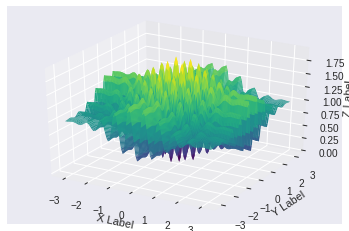

<Figure size 14400x14400 with 0 Axes>

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x1, x2)
zs = np.array([wavy([x,y],2,10) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.figure(figsize=(200,200))



Παρατηρούμε από το 3D γράφημα που παρήχθη πως υπάρχουν πολλές διακυμάνσεις και απότομες αλλαγές στις τιμές της συνάρτησης για κοντινά σημεία εισόδου (x1,x2). Σε διάφορες περιοχές, η Wavy στρέφει τα κοίλα άνω ενώ σε άλλες -πολλές φορές μάλιστα κοντινές περιοχές- στρέφει τα κοίλα κάτω. Βλέπουμε πως υπάρχουν πολλά τοπικά μέγιστα καθώς και πολλά τοπικά ελάχιστα, τα οποία όπως δίνεται μάλιστα στη συνάρτηση είναι 121!

**β)** Θα ακολουθήσουμε παρόμοια διαδικασία με αυτήν που χρησιμοποιήθηκε στο *Μέρος 1*  για την εύρεση του βέλτιστου αλγορίθμου και της βέλτιστης τιμής του προβλήματος.

Δημιουργούμε αρχικά ένα νέο toolbox, με νέο πληθυσμό για D=2 και το πεδίο ορισμού [-π,π].  Κάνουμε πάλι register πληθυσμό και συνάρτηση προς βελτιστοποίηση την οποία κάνουμε decorate με τις καινούριες feasible και distance προσαρμοσμένες στο πεδίο ορισμού και τις διαστάσεις της συνάρτησης.

In [0]:
#Νέες feasible και distance προσαρμοσμένες στο πεδίο ορισμού και τις διαστάσεις της Wavy.
d = 2;
MIN_BOUND = np.array([-pi]*d)
MAX_BOUND = np.array([pi]*d)

def feasible2( indiv ):
    if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
        return False
    return True

def distance2(indiv) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if(indiv[i] < MIN_BOUND[i]) : penalty = -pi - indiv[i]
        if(indiv[i] > MAX_BOUND[i]) : penalty = indiv[i] - pi
        dist = dist + penalty
    return dist

#Δημιουργία νέου toolbox για την καινούρια συνάρτησή μας
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create( "IndividualContainer", list , fitness= creator.FitnessMin)

toolbox2 = base.Toolbox()

toolbox2.register( "InitialValue", np.random.uniform, -pi, pi)
toolbox2.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox2.InitialValue, d)
toolbox2.register( "population", tools.initRepeat, list , toolbox2.indiv)

toolbox2.register( "evaluate", wavy,D=d,k=10)
toolbox2.decorate( "evaluate", tools.DeltaPenality (feasible2, 4*pi, distance2))

Τρέχουμε τη results με άλλο delta από πριν, καθώς και διαφορετικό global_minimum.

In [0]:
df2 = results(toolbox2,0.1,0)

Βρίσκουμε το συνδυασμό στρατιγικής και γενετικών τελεστών που οδηγεί σε ελάχιστη τιμή με μέγιστες επιτυχίες για τους γύρους που τρέχουμε τον αλγόριθμο. Από τους συνδυασμούς που προκύπτους επιλέγουμε αυτόν με τις λιγότερες αποτιμήσεις που χρειάστηκαν για να βρεθεί επιτυχώς ελάχιστο με μια απόκλιση delta.

In [0]:
df3 = df2[df2.Successes == 5]
df3[(df3.avg_min == 0) & (df3.s_avg_min == 0)]

,Crossover,Mutation,Selection,Strategy,Successes,avg_evals,avg_min,avg_time,s_avg_evals,s_avg_gens,s_avg_min
46,Uniform Low,FlipBit High,High,eaMuPlusLamda 0.8 0.2 50 150,5.0,2030.0,0.0,0.86,330.0,1.0,0.0
95,Uniform High,FlipBit High,Low,eaMuCommaLambda 0.8 0.2 50 150,5.0,2030.0,0.0,0.83,470.0,3.0,0.0


Επιλέγουμε το συνδυασμό 46, που βρίσκει για λιγότερες evaluations και γενεές επιτυχή τιμή
και βρίσκει το ολικό ελάχιστο της Wavy που ισούται με 0.


## Για D=1, 10, 20, 40 και μεγαλύτερες διαστάσεις
Δημιουργούμε την ***results_wavy***, παρόμοια με τη *results* με τη διαφορά πως το dataframe αποτελείται από διαφορετικές κατηγορίες, αυτές που ζητούνται από την εκφώνηση, καθώς και τη δυνατότητα μεταβολής της ποινής και του delta ανάλογα με τη διάσταση D των ατόμων του πληθυσμού μας. 

Χρησιμοποιούμε σε αυτην τη στρατιγική και τους τελεστές που βρέθηκαν ως βέλτιστοι για D=2.

In [0]:
def results_wavy(tb,D,delta,rounds,global_min,cxp,mup):
  import pandas as pd
  m = 50; l = 100;
  col = {'_cxp':[],'_mup':[],'Delta':[],'Dimensions':[],'Successes':[], 'avg_evals':[],'avg_min':[],'avg_time':[]}
  df = pd.DataFrame(col)
  def feasible2( indiv ):
    if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
        return False
    return True

  def distance2(indiv) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if(indiv[i] < MIN_BOUND[i]) : penalty = -pi*temp - indiv[i]
        if(indiv[i] > MAX_BOUND[i]) : penalty = indiv[i] - pi*temp
        dist = dist + penalty
    return dist
  
  for i in range(0,len(D)):
    MIN_BOUND = np.array([-pi]*D[i])
    MAX_BOUND = np.array([pi]*D[i])
    
    temp = D[i]
    tb.register( "InitialValue", np.random.uniform, -pi, pi)
    tb.register( "indiv", tools.initRepeat, creator.IndividualContainer, tb.InitialValue, D[i])
    tb.register( "population", tools.initRepeat, list , tb.indiv)
    tb.register( "evaluate", wavy,D=D[i],k=10)
    tb.decorate( "evaluate", tools.DeltaPenality (feasible2, 4*pi, distance2))

    regfunc(0.02,0.1,5,'Uniform','FlipBit',tb)
    a,b,c,d,e,f,g=solve(eaMuPlusLamda_with_stats,delta[i],cxp,mup,rounds,m,l,tb,global_min)
    df.loc[i] = [delta[i],D[i],a,cxp,mup,b,c,d]

  return df

Εκτυπώνουμε εδώ τις τιμές που προκύπτουν από την αποτίμηση όλων των διαστάσεων. Αρχικά θα χρησιμοποιήσουμε ενα delta κοντά στο επιθυμητό αποτελεσμα, ίδιο για όλες τις διαστάσεις.

In [0]:
D = [1,10,20,40,60,80,100]
delta = [0.01,0.01,0.01,0.01,0.01,0.01,0.01]
df4 = results_wavy(toolbox2,D,delta,10,0,0.8,0.2)
df4

,Delta,Dimensions,Successes,_cxp,_mup,avg_evals,avg_min,avg_time
0,0.01,1.0,10.0,0.8,0.2,1015.0,0.000000,0.776844
1,0.01,10.0,10.0,0.8,0.2,1015.0,0.000000,1.127118
2,0.01,20.0,10.0,0.8,0.2,1015.0,0.000000,1.510647
3,0.01,40.0,5.0,0.8,0.2,1015.0,0.013723,2.250609
4,0.01,60.0,0.0,0.8,0.2,1015.0,0.048737,2.975977
5,0.01,80.0,0.0,0.8,0.2,1015.0,0.081892,3.798615
6,0.01,100.0,0.0,0.8,0.2,1015.0,0.130475,4.509148


### Σχολιασμός 

### (α)                                                                                                                                                   
Παρατηρούμε πως όσο ανεβαίνουν οι διαστάσεις αν εξαιρέσουμε τις 3 πρώτες, που είναι βέλτιστη η τιμή τους, οι άλλες απομακρύνονται αισθητά από το στόχο. Εκτός αυτού, παρατηρούμε πως επειδή οι επιτυχίες μας μειώνονται αισθητά χρειάζονται περισσότερα evaluations μέχρι να βρεθεί η πρώτη τιμή που θεωρείται success. Αν πάλι αυξήσουμε το delta για να έχουμε επιτυχίες σε μεγαλύτερες διαστάσεις, παρατηρούμε αρνητικό αντίκτυπο στην μέση ελάχιστη τιμή που επιστρέφεται για σταθερό αριθμό γενεών και πληθυσμού.



### (β)  
Η κύρια αιτία για το φαινόμενο αυτό είναι ότι σε μεγαλύτερες διαστάσεις αυξάνεται εκθετικά ο αριθμός πιθανών ατόμων πληθυσμού, άρα μειώνεται η πιθανότητα εύρεσης ατόμων με καλό fitness για σταθερές τιμές γενεών και πληθυσμού. Επίσης για μεγαλύτερες διαστάσεις αυξάνεται η πιθανότητα κάποιο "γονίδιο" να ξεφύγει από τις επιθυμητές τιμές.

 

### (γ)  
Μία καλή λύση στο πρόβλημα αυτό είναι να επιβάλλουμε στο κάθε D διαφορετικό, αυξανόμενο τις περισσότερες φορές, delta. Έτσι για μεγαλύτερες διαστάσεις θεωρούμε επιτυχείς προσπάθειες και για μεγαλύτερη απόκλιση από το ολικό ελάχιστο ώστε να "ενημερώσουμε" πως βρισκόμαστε στη σωστή κατεύθυνση. Θα μπορούσαμε επίσης όσο περνάνε οι γενεές να μικραίνουμε το delta ώστε να γίνουμε πιο επιλεκτικοί όταν γνωρίζουμε ότι ήδη βρισκόμαστε στη σωστή κατεύθυνση. Αυτό θα οδηγήσει στην αύξηση των επιτυχιών αλλά και στη μείωση παράλληλα, λόγω του τελευταίου, των evaluations που πραγματοποιούμε μέχρι την πρώτη επιτυχία. Μπορούμε επίσης να "πειράξουμε" την πιθανότητα διασταύρωσης για να επηρεάσουμε τον ελιτισμό ή την πιθανότητα μετάλλαξης για να επηρεάσουμε την ανακάλυψη.



### Βελτιστοποίηση σε Μεγάλες Διαστάσεις

### (α)
Βασιζόμενοι λοιπόν στις απαντήσεις μας στα παραπάνω, θα κάνουμε ένα search για διάφορες τιμές των πιθανοτήτων διασταύρωσης και μετάλλαξης ωστε να καταλήξουμε σε καλύτερες τιμές μέσου ολικού ελαχίστου της συνάρτησής μας.


Δημιουργούμε την ***best_min*** για να δημιουργήσουμε το ζητούμενο πίνακα σύγκρισης των αποτελεσμάτων για τις διάφορες τιμές των πιθανοτήτων που θα βάλουμε.

In [0]:
def best_min(D,delta,cxps,mups):
  import pandas as pd
  col = {'_cxp':[],'_mup':[],'Delta':[],'Dimensions':[],'Successes':[], 'avg_evals':[],'avg_min':[],'avg_time':[]}
  df = pd.DataFrame(col)
  for i in range(0,np.size(cxps)):
    df = pd.concat([df,results_wavy(toolbox2,D,delta,10,0,cxps[i],mups[np.size(cxps)-1-i])])
  return df

In [0]:
D = [80]
delta = [0.15]
cxps = np.linspace(0.6,0.9,7)
mups = np.linspace(0.1,0.4,7)
df = best_min(D,delta,cxps,mups)
df

,Delta,Dimensions,Successes,_cxp,_mup,avg_evals,avg_min,avg_time
0,0.15,80.0,10.0,0.60,0.40,1015.0,0.071489,3.497471
0,0.15,80.0,10.0,0.65,0.35,1015.0,0.065321,3.551635
0,0.15,80.0,10.0,0.70,0.30,1015.0,0.063065,3.619725
0,0.15,80.0,10.0,0.75,0.25,1015.0,0.084034,3.697337
0,0.15,80.0,10.0,0.80,0.20,1015.0,0.085488,3.758930
0,0.15,80.0,10.0,0.85,0.15,1015.0,0.088346,3.878810
0,0.15,80.0,10.0,0.90,0.10,1015.0,0.114522,3.936818


Παρατηρούμε λοιπόν πως έχουμε καλύτερα αποτελέσματα για cxp=0.7, mup=0.3, ενώ όσο αυξάνεται το cxp και αντίστοιχα μειώνεται το mup έχουμε χειρότερες τιμές avgmin, όπως συμβαίνει και για cxp<0.65.
Επιλέγουμε λοιπόν νέες τιμές των πιθανοτήτων στα διαστήματα [0.66,0.70] για το cxp και [0.30,0.34] για το mup με μικρότερο βήμα για μεγαλύτερη ακρίβεια , στη λογική του progressive grid search.

In [0]:
D = [80]
delta = [0.15]
cxps = np.linspace(0.66,0.70,5)
mups = np.linspace(0.30,0.34,5)
df2 = best_min(D,delta,cxps,mups)
df2


,Delta,Dimensions,Successes,_cxp,_mup,avg_evals,avg_min,avg_time
0,0.15,80.0,10.0,0.66,0.34,1015.0,0.071022,3.620354
0,0.15,80.0,10.0,0.67,0.33,1015.0,0.071066,3.597913
0,0.15,80.0,10.0,0.68,0.32,1015.0,0.080414,3.605753
0,0.15,80.0,10.0,0.69,0.31,1015.0,0.061848,3.599054
0,0.15,80.0,10.0,0.70,0.30,1015.0,0.069645,3.627553


Παρατηρούμε λοιπόν βελτίωση, αφού για τιμές [cxp,mup] = [0.69,0.31] αντί για τις αρχικές [0.8,0.2] έχουμε μείωση του ολικού ελαχίστου. Ενδεχομένως για άλλους συνδυασμούς πιθανοτήτων που δεν έχουν άθροισμα 1 αλλά μικρότερο να είχαμε κάποιο καλύτερο αποτέλεσμα, όχι σημαντικά καλύτερο ωστόσο καθώς μεγαλύτερη επίδραση στην τιμή του avg_min έχουν προφανώς η διάσταση D, και ο αριθμός των γενεών για τις οποίε τρέχουμε τον γενετικό μας αλγόριθμο.

### (β)
Μειώνουμε τις διαστάσεις στις 40 και μειώνουμε το delta αναζητώντας τιμή για την οποία έχουμε 35%-50% επιτυχίες. Μετά απο αναζήτηση με διάφορες δοκιμές καταλήγουμε στην τιμή delta = 2e-07, για την οποία παίρνουμε 4/10 successes.



In [0]:
D = [40]
delta = [0.0000002]
df4 = results_wavy(toolbox2,D,delta,10,0,0.8,0.2)
df4


,Delta,Dimensions,Successes,_cxp,_mup,avg_evals,avg_min,avg_time
0,2.000000e-07,40.0,4.0,0.8,0.2,1015.0,0.007112,2.26548


Υποδιπλασιάζουμε την τιμή του delta, με αποτέλεσμα τη μείωση των επιτυχιών. Ακολουθώντας τη μέθοδο που χρησιμοποιήσαμε και παραπάνω, παρατηρούμε πως με μεταβολή των πιθανοτήτων διασταύρωσης και μετάλλαξης μπορούμε να ανεβάσουμε τον αριθμό των επιτυχιών, ακόμα και σε 100% !

In [0]:
D = [40]
delta = [0.0000002/2]
cxps = np.linspace(0.6,0.9,7)
mups = np.linspace(0.1,0.4,7)
df2 = best_min(D,delta,cxps,mups)
df2

,Delta,Dimensions,Successes,_cxp,_mup,avg_evals,avg_min,avg_time
0,1.000000e-07,40.0,10.0,0.60,0.40,1015.0,0.000000,2.110279
0,1.000000e-07,40.0,10.0,0.65,0.35,1015.0,0.000000,2.158801
0,1.000000e-07,40.0,9.0,0.70,0.30,1015.0,0.000498,2.210544
0,1.000000e-07,40.0,8.0,0.75,0.25,1015.0,0.003282,2.250656
0,1.000000e-07,40.0,7.0,0.80,0.20,1015.0,0.005101,2.317725
0,1.000000e-07,40.0,5.0,0.85,0.15,1015.0,0.005278,2.335199
0,1.000000e-07,40.0,6.0,0.90,0.10,1015.0,0.016362,2.376902


Για εκ νέου υποδιπλασιασμό της τιμής delta, εφαρμόζοντας την ίδια μέθοδο μπορούμε ακόμα να παρατηρήσουμε αρκετά περισσότερες (παραπάνω από διπλάσιες μάλιστα) επιτυχίες απ' την αρχική μας εκτέλεση με τις μη βελτιστες πιθανότητες διασταύρωσης και μετάλλαξης.

In [0]:
D = [40]
delta = [0.0000002/4]
cxps = np.linspace(0.6,0.9,7)
mups = np.linspace(0.1,0.4,7)
df2 = best_min(D,delta,cxps,mups)
df2

,Delta,Dimensions,Successes,_cxp,_mup,avg_evals,avg_min,avg_time
0,5.000000e-08,40.0,9.0,0.60,0.40,1015.0,0.000943,2.146828
0,5.000000e-08,40.0,9.0,0.65,0.35,1015.0,0.000682,2.148009
0,5.000000e-08,40.0,6.0,0.70,0.30,1015.0,0.003743,2.179376
0,5.000000e-08,40.0,7.0,0.75,0.25,1015.0,0.000507,2.226283
0,5.000000e-08,40.0,5.0,0.80,0.20,1015.0,0.002081,2.270307
0,5.000000e-08,40.0,1.0,0.85,0.15,1015.0,0.018501,2.311856
0,5.000000e-08,40.0,3.0,0.90,0.10,1015.0,0.012348,2.361716


Πιθανώς για μεγαλύτερες διαστάσεις (πχ D = 100) το πρόβλημα να γινόταν δυσκολότερο και η μεταβολή μόνο των cxp,mup να μην αρκούσε για την αύξηση των επιτυχιών σε τέτοιο βαθμό. 
Θα ήταν τότε απαραίτητη η αύξηση των γενεών μέχρι να ευρεθούν αρκετές επιτυχημένες τιμές για το συγκεκριμένο delta. 

Η εύρεση του ελάχιστου αριθμού γενεών μπορεί να πραγματοποιηθεί με (progressive ) grid search για μεταβλητό αριθμό γενεών. Σε κάθε επανάληψη θα πρέπει να γίνεται register ο νέος αλγόριθμος που τρέχει για τον εκάστοτε αριθμό γενεών και σκοπός θα είναι η εύρεση 2 Χ Ναρχικο = 8 στην περίπτωσή μας επιτυχιών ή περισσότερων για ελάχιστο κατά το δυνατόν αριθμό γενεών. 

Η εν λόγω αναζήτηση μπορεί να γίνει και "με το χέρι", με τη λογική της binary search, για τον εντοπισμό του αριθμού γενεών που δίνει τον επιθυμητό αριθμό επιτυχιών, με τον αμέσως λιγότερο αριθμό γενεών να μην οδηγεί στις επιθυμητές επιτυχίες. 

Σαφώς προηγείται μια αναζήτηση των βέλτιστων cxp, mup καθώς και αυτές παίζουν αν και σε μικρότερο βαθμό το ρόλο τους στην επιτυχία του αλγορίθμου.   